# Preprocess PCAM

Data exploration of the PCAM crop dataset 
https://iopscience.iop.org/article/10.1088/1748-9326/ab3b93/meta

In [1]:
import os
import matplotlib.pyplot as plt
import glob
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from rasterio.mask import mask
from rasterstats import zonal_stats
import fiona
import geopandas as gpd
import xarray as xr
import numpy as np
import rioxarray≠
import pandas as pd
import dask

In [2]:
PCAM_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/PCAM/'

In [3]:
PCAM_2002 = xr.open_dataset(PCAM_dir + 'pcam_mean_2002.nc')

In [4]:
PCAM_2002

<xarray.Dataset>
Dimensions:    (crop: 17, lat: 360, lon: 720)
Coordinates:
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat        (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * crop       (crop) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
Data variables:
    crs        int32 ...
    pcam_mean  (crop, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 2.9-5)
    date:         2019-08-23 10:47:24
    Title:        Probabilistic global maps of crop-specific areas from 1961 ...
    Description:  Crop-specific mean likelihood pixel fractions for the year ...
    Contact:      Megan Konar, mkonar@illinois.edu
    Institution:  University of Illinois at Urbana-Champaign
    Citation:     Jackson, N., M. Konar, P. Debaere, and L. Estes (2019) Prob...

In [13]:
pcam_mean_2002 = PCAM_2002.pcam_mean

In [44]:
maize_2002 = pcam_mean_2002.isel(crop=3)
rice_2002 = pcam_mean_2002.isel(crop=8)

In [32]:
maize_2002.max()

<xarray.DataArray 'pcam_mean' ()>
array(2.0194733, dtype=float32)
Coordinates:
    crop     int32 4

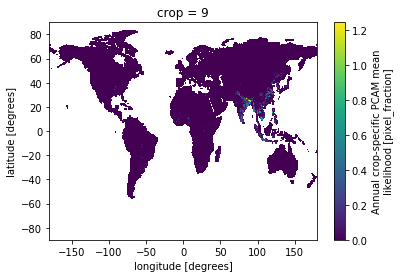

In [46]:
rice_2002.plot()

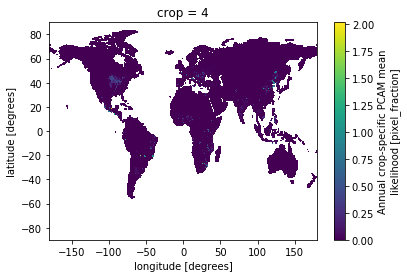

In [33]:
maize_2002.plot()

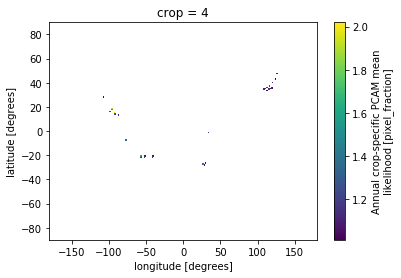

In [49]:
maize_2002.where(maize_2002>1).plot()